## Kaggle November 2022 - Amir Teimour Sareban, Brandon Abundis, Gregory Duke
### Data Processing and Analysis

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

path = Path('Data')
submission = pd.read_csv(path / 'sample_submission.csv', index_col='id')
labels = pd.read_csv(path / 'train_labels.csv', index_col='id')

sub_ids = submission.index
gt_ids = labels.index 

subs = sorted(os.listdir(path / 'submission_files'))

df = pd.DataFrame()

for i in range(len(subs)):
    df[i] = pd.read_csv(path / 'submission_files' / subs[i], index_col='id')
    
df.head(40000)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
id,,,,,,,,,,,,,,,,,,,,,
0,0.709336,0.799007,0.851891,0.537158,0.623930,0.705970,0.503437,0.633185,0.641550,0.666604,...,0.769207,0.750250,0.663370,0.739333,0.822384,0.749498,0.729800,0.867847,0.745888,0.787
1,0.452988,0.364453,0.567582,0.354468,0.513818,0.584119,0.454809,0.238501,0.472171,0.522314,...,0.640052,0.794052,0.721298,0.804369,0.620626,0.733606,0.816942,0.814229,0.598331,0.547
2,0.675462,0.842260,0.800013,0.525229,0.692071,0.715418,0.651008,0.609124,0.691198,0.609994,...,0.812841,0.779859,0.865657,0.828493,0.763010,0.802883,0.806891,0.896058,0.855776,0.667
3,0.481046,0.577118,0.683032,0.541356,0.630088,0.664514,0.413373,0.508210,0.526140,0.584565,...,0.824703,0.799698,0.800130,0.716604,0.603779,0.708499,0.844837,0.853057,0.850657,0.622
4,0.957339,0.910337,0.917322,0.874487,0.787595,0.854273,0.843846,0.876749,0.821128,0.913054,...,0.934803,0.900150,0.960911,0.906037,0.961240,0.935608,0.889757,0.978505,0.953681,0.934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.382515,0.288985,0.483297,0.281330,0.414223,0.463336,0.390367,0.229408,0.455481,0.323629,...,0.561950,0.654353,0.614568,0.606837,0.474038,0.578634,0.584544,0.542198,0.542056,0.266
39996,0.352498,0.300423,0.594827,0.345519,0.488960,0.506300,0.216482,0.291425,0.471500,0.315838,...,0.584715,0.620182,0.635899,0.584809,0.677014,0.617092,0.607261,0.577821,0.589929,0.725
39997,0.577554,0.673746,0.760426,0.483366,0.682265,0.663974,0.448841,0.537298,0.575501,0.606992,...,0.739480,0.760507,0.774452,0.817324,0.802529,0.815348,0.712255,0.864388,0.786978,0.572


#### Visualization of First Four Submission Files

<Figure size 12000x9000 with 0 Axes>

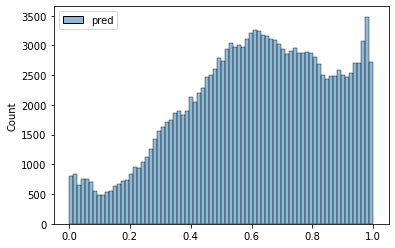

<Figure size 12000x9000 with 0 Axes>

In [44]:
# Combining 4 submission files
t0 = pd.read_csv(path / 'submission_files' / subs[0], index_col='id')
t1 = pd.read_csv(path / 'submission_files' / subs[1], index_col='id')
t2 = pd.read_csv(path / 'submission_files' / subs[2], index_col='id')
t3 = pd.read_csv(path / 'submission_files' / subs[3], index_col='id')

blend = pd.concat([t0, t1, t2, t3], axis = 1)
sns.histplot(blend)
blend.columns = [1, 2, 3, 4]
blend2 = blend.mad(axis=1).to_frame()
plt.figure(figsize=(8,6),dpi=1500)

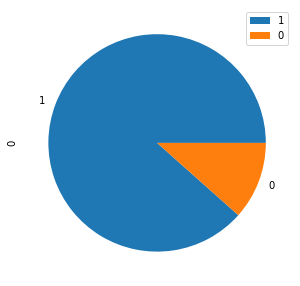

In [3]:
#We used 0.5 as threshold for prediction. 
#lable = 1 for prediction >= 0.5
#lable = 0 for prediction < 0.5
#Using a pie chart to visualize the prediction of each label
df['mean'] = df.mean(axis=1)
column = df['mean']
countOne = column[column >= 0.5].count()
countZero = column[column < 0.5].count()

pie = pd.DataFrame([countOne,countZero], index=['1', '0'])
 
# make the plot
pie.plot(kind='pie', subplots=True, figsize=(5, 5))

# show the plot
plt.show()

In [29]:
from scipy.stats import entropy

arr2=[]
rows, cols=5000,2
arr2 = [[0 for i in range(cols)] for j in range(rows)]

for i in range(5000):
    arr2[i][0] = i
    arr2[i][1] = entropy(df[i])

sorted_entropy = sorted(arr2, key=lambda x: x[1])

df_entropy_sorted = pd.DataFrame()

for i in range(500):
    df_entropy_sorted[i] = df[sorted_entropy[i][0]]

df_entropy_sorted.head(40000)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
id,,,,,,,,,,,,,,,,,,,,,
0,0.657442,0.828683,0.855308,0.894822,0.823816,0.894629,0.785949,0.798858,0.811564,0.801551,...,0.769960,0.789920,0.836478,0.775000,0.872915,0.807652,0.853667,0.865724,0.821021,0.725178
1,0.604260,0.658800,0.610155,0.629425,0.712462,0.623028,0.704430,0.736871,0.617721,0.681175,...,0.694543,0.636025,0.602166,0.681780,0.563304,0.664212,0.663937,0.759449,0.707692,0.778673
2,0.698322,0.799409,0.800834,0.820534,0.754158,0.816815,0.809037,0.820564,0.776251,0.793052,...,0.819349,0.809023,0.844543,0.844858,0.760097,0.816562,0.829082,0.855509,0.832401,0.650798
3,0.706474,0.802717,0.828170,0.834038,0.746796,0.839119,0.770095,0.787078,0.749285,0.745441,...,0.755088,0.820410,0.812555,0.793494,0.736902,0.813405,0.795090,0.854161,0.781215,0.834711
4,0.911603,0.956967,0.935723,0.948429,0.962132,0.951758,0.958001,0.954075,0.961262,0.932570,...,0.960256,0.967649,0.936574,0.959914,0.947804,0.955720,0.946012,0.978417,0.966654,0.927146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.468286,0.485504,0.439685,0.482752,0.497170,0.498065,0.430091,0.395540,0.474112,0.530819,...,0.483017,0.475842,0.441644,0.298172,0.441449,0.491194,0.491901,0.490111,0.519321,0.367281
39996,0.492161,0.643212,0.605095,0.596257,0.627440,0.602620,0.607634,0.584605,0.597267,0.581165,...,0.567634,0.667883,0.524118,0.386275,0.638183,0.550638,0.587827,0.535592,0.565692,0.608775
39997,0.642477,0.802925,0.719630,0.739471,0.673846,0.724421,0.760954,0.760052,0.780879,0.744455,...,0.737507,0.828669,0.766705,0.486803,0.748117,0.741709,0.825449,0.872117,0.782825,0.846157


### Blending Submission Files

<AxesSubplot:ylabel='Count'>

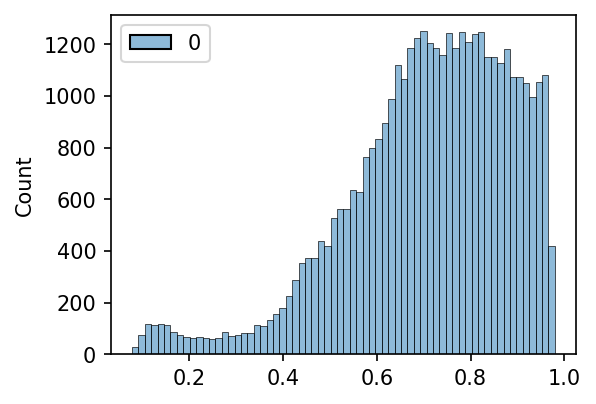

In [8]:
# Averaging predictions of all 5,000 submission files
blend1 = df.mean(axis=1).to_frame()

plt.figure(figsize=(4,3),dpi=150)
sns.histplot(blend1)

### Data Normalization and Analysis

<AxesSubplot:>

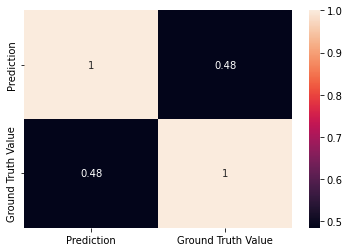

In [9]:
heatDF = pd.concat([blend1, labels], axis = 1)
heatDF.columns = ['Prediction', 'Ground Truth Value']

sns.heatmap(heatDF.corr(method='spearman'), annot=True)

#### We can observe a correlation of .48 between our predictions and our ground truth values. Can we use this metric to determine how successful our models are?

In [10]:
# Normalizing 5,000 file dataframe using StandardScaler and MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
xscaled=sc.fit_transform(df)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 

In [11]:
# Converting StandardScaler data back to dataframe
standard = pd.DataFrame(xscaled)
standard.head(40000)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.519767,0.745352,0.799097,-0.112741,0.125777,0.375046,-0.255772,0.150331,0.433636,0.417925,...,0.117235,-0.469986,0.049792,0.378061,0.129596,0.028902,0.615626,0.137754,0.884514,0.372495
1,-0.699777,-0.911533,-0.453131,-0.831374,-0.586156,-0.338202,-0.461388,-1.377359,-0.757831,-0.266345,...,0.543705,-0.101767,0.527284,-0.561810,0.020686,0.775688,0.342103,-0.654661,-0.326023,-0.476594
2,0.358616,0.910269,0.570602,-0.159665,0.566346,0.430349,0.368211,0.057199,0.782875,0.149462,...,0.405517,0.815851,0.704401,0.101473,0.495449,0.689553,0.759539,0.727878,0.279245,0.513311
3,-0.566295,-0.100675,0.055364,-0.096227,0.165592,0.132386,-0.636594,-0.333405,-0.378195,0.028869,...,0.598676,0.399329,-0.117084,-0.640290,-0.151375,1.014741,0.540177,0.700387,0.052269,0.164089
4,1.699612,1.169836,1.087286,1.214184,1.183960,1.243130,1.183599,1.093086,1.696845,1.586671,...,1.576709,1.421333,1.273727,1.024909,1.405030,1.399695,1.180127,1.253650,1.625968,1.275625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.035044,-1.199281,-0.824361,-1.119072,-1.230091,-1.045199,-0.733872,-1.412555,-0.875234,-1.208575,...,-0.816449,-0.780196,-0.922990,-1.244676,-1.041356,-1.215907,-1.045613,-0.956871,-1.743360,-1.160471
39996,-1.177847,-1.155670,-0.333132,-0.866576,-0.746876,-0.793712,-1.469120,-1.172507,-0.762551,-1.245522,...,-1.149149,-0.644605,-1.084719,-0.299131,-0.777799,-1.021228,-0.863889,-0.699782,0.571792,-0.735881
39997,-0.107170,0.267752,0.396243,-0.324338,0.502945,0.129225,-0.486623,-0.220815,-0.030974,0.135225,...,0.217100,0.236107,0.622399,0.285568,0.580874,-0.121455,0.597980,0.358417,-0.199926,0.198432
39998,0.534120,0.717191,0.601786,0.960167,0.321224,0.147634,-0.281624,1.376903,-0.414493,-0.155053,...,-0.243730,0.315696,0.335438,0.336182,0.345825,-0.925889,0.141866,-0.289093,0.148104,0.243483


In [12]:
# Converting MinMaxScaler transformed data into dataframe
minmax = pd.DataFrame(scaled_values)
blendScaled = minmax.mean(axis=1).to_frame()
blendScaled.head(40000)

,0
0,0.773007
1,0.615186
2,0.799978
3,0.733676
4,0.943015
...,...
39995,0.486739
39996,0.565744
39997,0.741766
39998,0.747824


#### Histogram of Normalized and Blended Data

<AxesSubplot:ylabel='Count'>

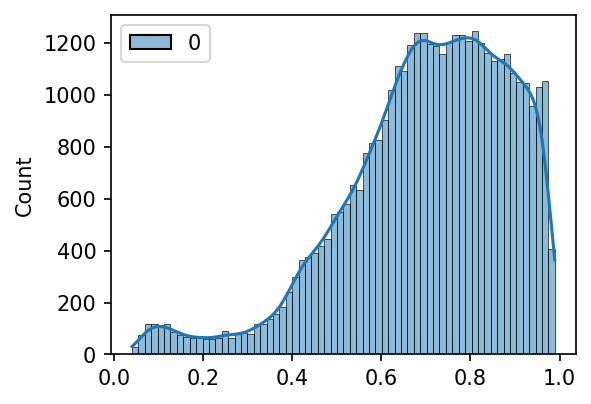

In [13]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot(blendScaled, kde= True)

### Splitting Dataset
We split four different datasets. First, we split the dataset containing a mean blend of all 5,000 submission files. Second, we split a dataset containing the mean blend of 4 submission files. Third, we split a dataset containing 4 unblended submission files. Lastly, we split a dataset containing a blend of 5,000 submission files, normalized using the MinMax Scaler

In [14]:
# Create xtrain, xtest, and ytrain from blend1 dataframe (All 5000 submission files)
xtrain = blend1.loc[:19999, :] # The first 20k rows
xtest = blend1.loc[20000:, :]  # Rows 20k-40k
ytrain = labels                # Ground truth labels for first 20k rows

In [15]:
# Create xtrain, xtest, and ytrain from blend2 dataframe (First 4 submission files)
xtrain1 = blend2.loc[:19999, :] # The first 20k rows
xtest1 = blend2.loc[20000:, :]  # Rows 20k-40k
ytrain1 = labels                # Ground truth labels for first 20k rows

In [16]:
# Without blending submission files
xtrain2 = blend.loc[:19999, :] # The first 20k rows
xtest2 = blend.loc[20000:, :]  # Rows 20k-40k
ytrain2 = labels                # Ground truth labels for first 20k rows

In [17]:
# Blending normalized submission files (MinMaxScaler)
xtrainScaled = blendScaled.loc[:19999, :] # The first 20k rows
xtestScaled = blendScaled.loc[20000:, :]  # Rows 20k-40k
ytrainScaled = labels                # Ground truth labels for first 20k rows

In [18]:
from sklearn.model_selection import train_test_split
x = blend1.loc[:19999, :]
y = labels
xxtrain, xxtest, yytrain, yytest = train_test_split(x, y, test_size=.2)

In [33]:
xtrainEnt = df_entropy_sorted.loc[:19999, :]
ytrainEnt = labels
xtestEnt = df_entropy_sorted.loc[20000:, :]

### XGBoost Classifier

Logloss Score for XGB Classifier on 5k Submission Files: 0.9329937230101787
Logloss Score for XGB Classifier on 4 Submission Files: 1.0681340355647118
Logloss Score for XGB Classifier on Normalized Data: 0.9276102455246262
1.2427744178039626


,0,1
0,0.545658,0.454342
1,0.260739,0.739261
2,0.745475,0.254525
3,0.132310,0.867690
4,0.990525,0.009475
...,...,...
19995,0.826651,0.173349
19996,0.657550,0.342450
19997,0.760529,0.239471
19998,0.658753,0.341247


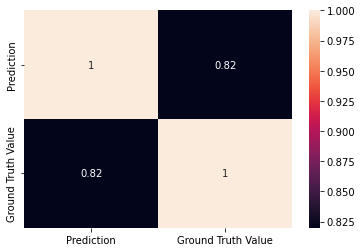

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

boost = XGBClassifier()
boost.fit(xtrain, ytrain)

ytest = boost.predict_proba(xtest)

score = log_loss(labels, ytest[:,1] )
print('Logloss Score for XGB Classifier on 5k Submission Files:', score)

boost = XGBClassifier()
boost.fit(xtrain2, ytrain2)

ytest = boost.predict_proba(xtest2)

score = log_loss(labels, ytest[:,1] )
print('Logloss Score for XGB Classifier on 4 Submission Files:',score)

boost = XGBClassifier()
boost.fit(xtrainScaled, ytrainScaled)

ytest = boost.predict_proba(xtestScaled)

score = log_loss(labels, ytest[:,1] )
print('Logloss Score for XGB Classifier on Normalized Data:', score)

y_corr = boost.predict(xtest)
# Judging correlation between our new predictions and predicted truth values
df2 = pd.DataFrame(ytest[:,1])
df3 = pd.DataFrame(y_corr)
GBCcorr = pd.concat([df2, df3], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']

sns.heatmap(GBCcorr.corr(method='spearman'), annot=True)

# Testing XGBoost on entropy-sorted dataframe
boost = XGBClassifier()
boost.fit(xtrainEnt, ytrainEnt)

ytest = boost.predict_proba(xtestEnt)
ypred = boost.predict(xtrainEnt)
df2 = pd.DataFrame(ytest[:,1])
df3 = pd.DataFrame(ypred)
GBCcorr = pd.concat([df3, df2], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']
score = log_loss(labels, ytest[:,1] )
print(score)

dfEnt = pd.DataFrame(ytest)
dfEnt.head(40000)

### GradientBoostingClassifier
We varied n_estimators and learning_rates parameters, attempting to find the lowest resultant logloss score. 

Estimator Variants: 
Logloss Score for 1 estimator :  0.6931637317229395
Logloss Score for 5 estimator :  0.6932871938305112
Logloss Score for 10 estimator :  0.6935622156222234
Logloss Score for 15 estimator :  0.6939650266198689
Logloss Score for 30 estimator :  0.695838829105166
Logloss Score for 50 estimator :  0.6996311834916678
Learning Rate Variants: 
Logloss Score for 0.005 learning rate:  0.6931637317229395
Logloss Score for 0.1 learning rate:  0.6946056700352647
Logloss Score for 0.25 learning rate:  0.7012119098549593
Logloss Score for 0.5 learning rate:  0.7236053381532495
Logloss Score for 0.75 learning rate:  0.7591229423042672
Logloss Score for 1 learning rate:  0.806095126694406
Logloss Score for GBC using 10 sub files
Logloss Score for GBC using 10 sub files: 0.6931367505949558
Logloss Score for GBC using 10 sub files: 0.6931842106646466


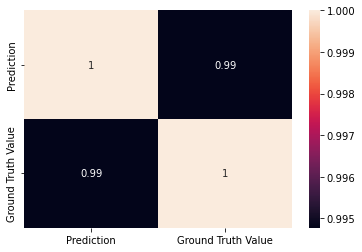

In [117]:
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,mean_squared_error
learning_rates = [0.005, 0.1, 0.25, 0.5, 0.75, 1]
n_estimator = [1, 5, 10, 15, 30, 50]

print('Estimator Variants: ')
for x in n_estimator:
    gb = GradientBoostingClassifier(n_estimators=x, learning_rate = 0.005)
    gb.fit(xtrain, ytrain)
    ytest = gb.predict_proba(xtest)
    score = log_loss(labels, ytest[:,1] )
    print('Logloss Score for', x, 'estimator : ', score)

print('Learning Rate Variants: ')
for x in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=1, learning_rate = x)
    gb.fit(xtrain, ytrain)
    ytest = gb.predict_proba(xtest)
    score = log_loss(labels, ytest[:,1] )
    print('Logloss Score for', x, 'learning rate: ', score)
    
print('Logloss Score for GBC using 10 sub files')
gb = GradientBoostingClassifier(n_estimators=1, learning_rate = 0.005)
gb.fit(xtrain1, ytrain1)
ytest1 = gb.predict_proba(xtest1)
score = log_loss(labels, ytest1[:,1] )
print('Logloss Score for GBC using 10 sub files:', score)

# Let's predict a set of truth values and check the correlation between our truth values and our predictions.
gb = GradientBoostingClassifier(n_estimators=4, learning_rate = .005, max_depth=80)
gb.fit(xtrain, ytrain)
ytest = gb.predict_proba(xtest)

y_corr = gb.predict(xtest)
# Judging correlation between our new predictions and predicted truth values
df2 = pd.DataFrame(ytest[:,1])
df3 = pd.DataFrame(y_corr)
GBCcorr = pd.concat([df2, df3], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']
score = log_loss(labels, ytest[:,1] )
print('Logloss Score for GBC using 10 sub files:', score)

sns.heatmap(GBCcorr.corr(method='spearman'), annot=True)

g = pd.concat([labels, df2], axis = 1)
g.columns = ['id', 'pred']
g.to_csv('blend.csv')


### Random Forest Classifier
We tested several calls of the Random Forest Classifier with warm_start enabled, hoping to achieve a better logloss score. The third call resulted in an improved logloss score, though subsequent calls did not. 

Random Forest Classifier Logloss Score: 0.7883714905209454
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324
Random Forest Classifier Logloss Score: 0.7849781349818324


<AxesSubplot:>

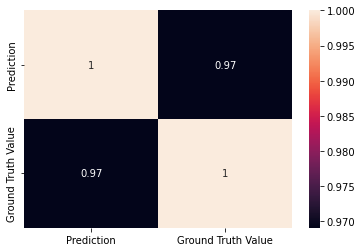

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=1, bootstrap=False).fit(xtrain, ytrain)
ytest = rfc.predict_proba(xtest)
score = log_loss(labels, ytest[:,1] )
print('Random Forest Classifier Logloss Score:', score)

# Enabling warm start for 10 iterations
for x in range(0, 10):
    rfc = RandomForestClassifier(max_depth=1, bootstrap=True, warm_start=True, random_state=2).fit(xtrain, ytrain)
    ytest = rfc.predict_proba(xtest)
    score = log_loss(labels, ytest[:,1] )
    print('Random Forest Classifier Logloss Score:', score)

y_corr = rfc.predict(xtest)
# Judging correlation between our new predictions and predicted truth values
df2 = pd.DataFrame(ytest[:,1])
df3 = pd.DataFrame(y_corr)
GBCcorr = pd.concat([df2, df3], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']

sns.heatmap(GBCcorr.corr(method='spearman'), annot=True)

### Light GBM Classifier
We reduced the number of iterations from 100 (default), to 1, which achieved an improved logloss score. 

Light Gradient Boosting, Default Logloss Score: 0.9194587525647636
Light Gradient Boosting, Logloss Score: 0.6947290264337387


<AxesSubplot:>

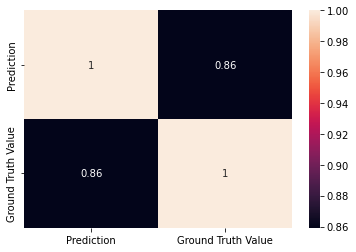

In [61]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier().fit(xtrain, ytrain)
ytest = lgb.predict_proba(xtest)
score = log_loss(labels, ytest[:,1] )
print('Light Gradient Boosting, Default Logloss Score:', score)

lgb = LGBMClassifier(num_iterations=1).fit(xtrain, ytrain)
ytest = lgb.predict_proba(xtest)
score = log_loss(labels, ytest[:,1] )
print('Light Gradient Boosting, Logloss Score:', score)

y_corr = lgb.predict(xtest)
# Judging correlation between our new predictions and predicted truth values
df2 = pd.DataFrame(ytest[:,1])
df3 = pd.DataFrame(y_corr)
GBCcorr = pd.concat([df2, df3], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']

sns.heatmap(GBCcorr.corr(method='spearman'), annot=True)

### MLP Classifier

MLP Classifier, Logloss Score: 0.6931482748915122
MLP Classifier, Logloss Score for Normalized Data: 0.6931480180560162


<AxesSubplot:>

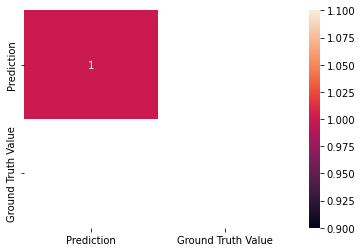

In [65]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(solver='sgd', alpha=.0000001, hidden_layer_sizes=(5, 2), random_state=1, 
                   activation='relu').fit(xtrain, ytrain)
y_pred = MLP.predict_proba(xtest)
score = log_loss(labels, y_pred[:,1] )
print('MLP Classifier, Logloss Score:', score)


MLP = MLPClassifier(solver='sgd', alpha=.0000001, hidden_layer_sizes=(5, 2), random_state=1, 
                   activation='relu').fit(xtrainScaled, ytrainScaled)
y_pred = MLP.predict_proba(xtestScaled)
score = log_loss(labels, y_pred[:,1] )
print('MLP Classifier, Logloss Score for Normalized Data:', score)

y_corr = MLP.predict(xtest)
# Judging correlation between our new predictions and predicted truth values
df2 = pd.DataFrame(y_pred[:,1])
df3 = pd.DataFrame(y_corr)
GBCcorr = pd.concat([df2, df3], axis = 1)
GBCcorr.columns = ['Prediction', 'Ground Truth Value']

sns.heatmap(GBCcorr.corr(method='spearman'), annot=True)

### Ridge Regression 

In [28]:
from sklearn.linear_model import Ridge

clfRidge = Ridge(alpha=1.0)
clfRidge.fit(xtrain, ytrain)
y_pred = clfRidge.predict(xtest)
score = log_loss(labels, y_pred )
print('Ridge Classifier, Logloss Score:', score)

Ridge Classifier, Logloss Score: 1.4372184163194046


<AxesSubplot:xlabel='Model', ylabel='Scores'>

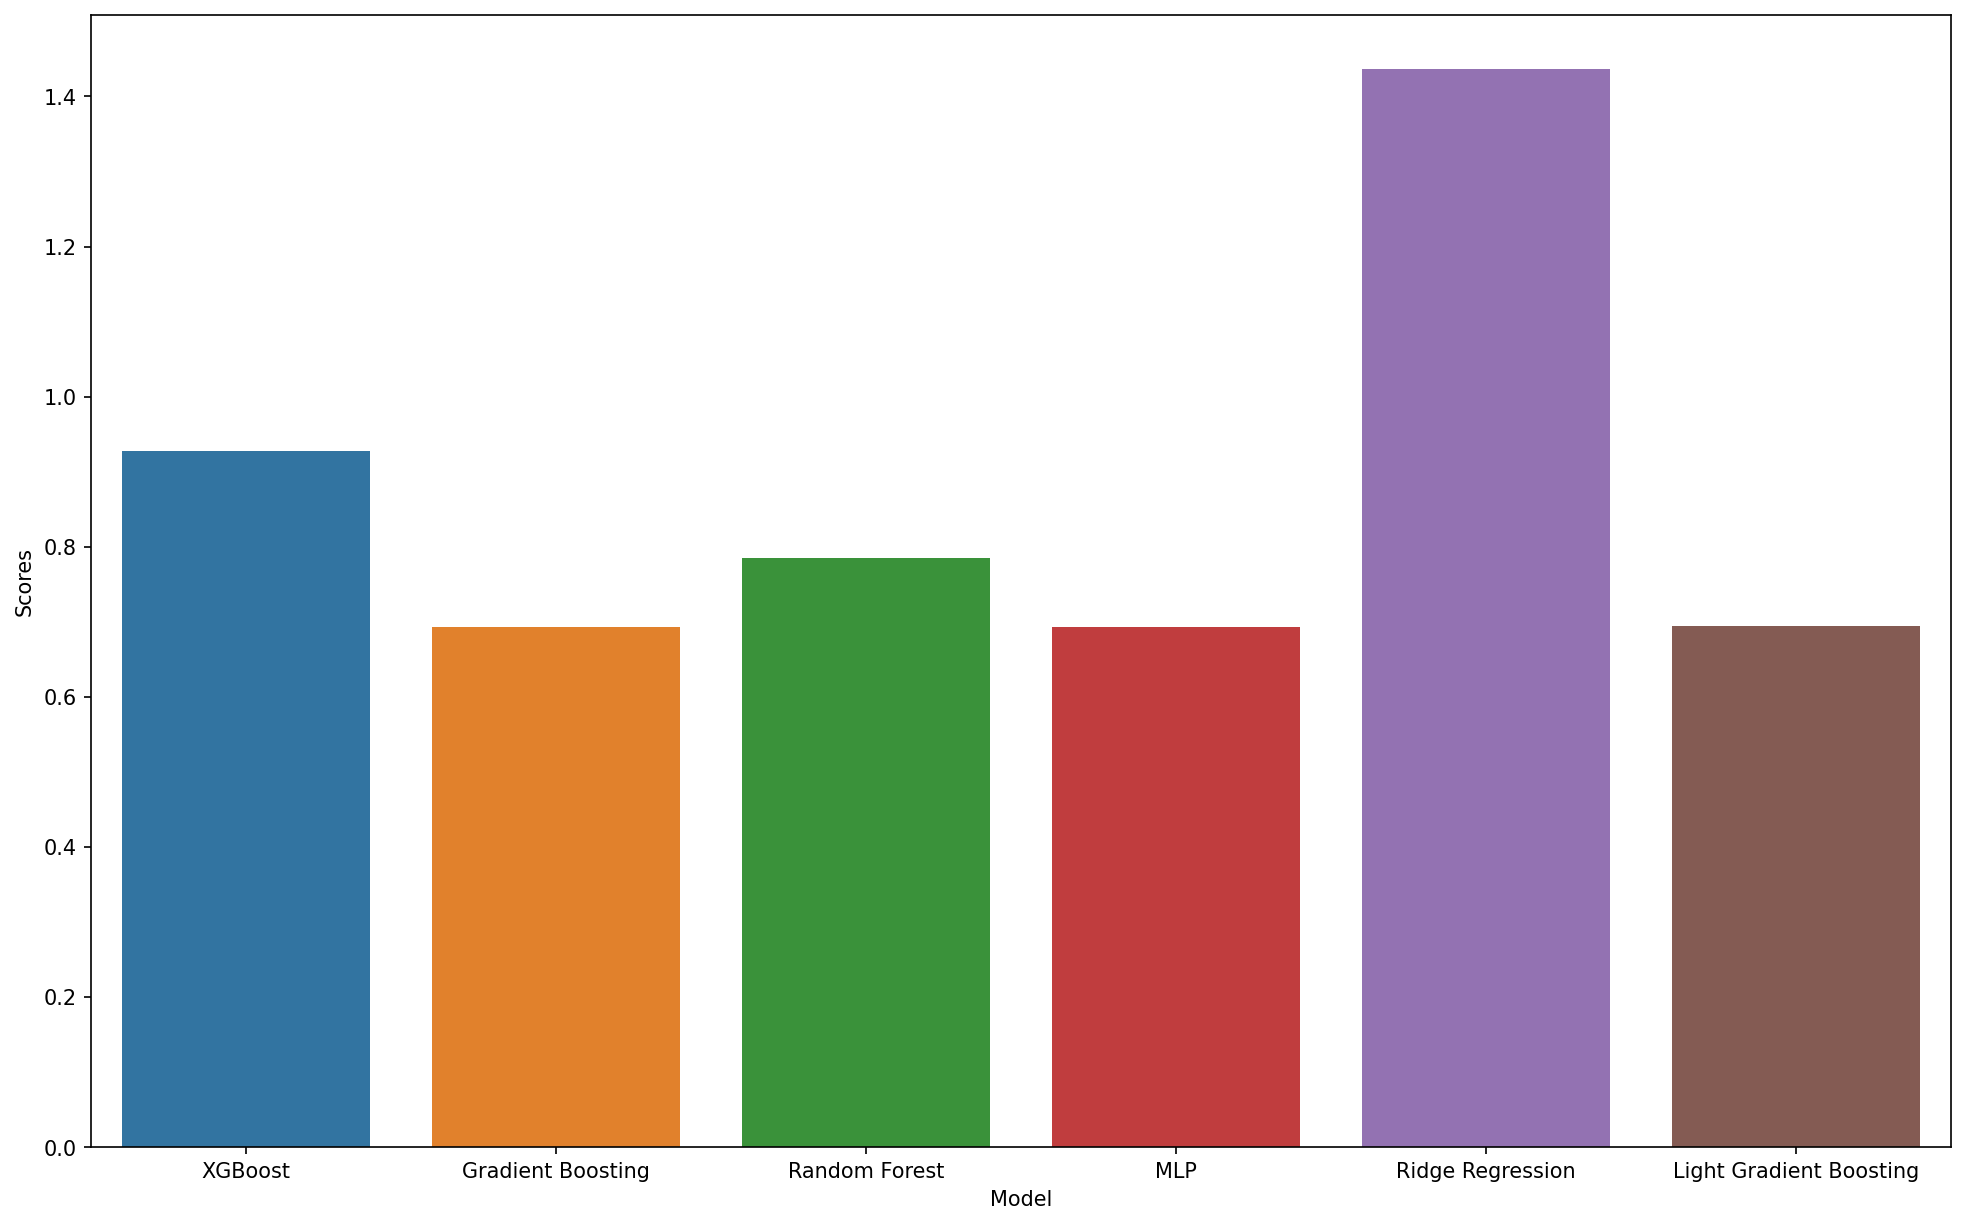

In [72]:
data = {"Model":["XGBoost", "Gradient Boosting", "Random Forest", "MLP", "Ridge Regression", "Light Gradient Boosting"],
        "Scores":[0.9276102455246262, 0.6931637317229395, 0.7849781349818324, 
        0.6931482748915122, 1.4372184163194046, 0.6947290264337387]}
graph = pd.DataFrame(data)
graph.head(10)

plt.figure(figsize=(16,10),dpi=150)
#sns.histplot(graph['Scores'], x=graph['Model'], kde= True)

plot = ["0.9276102455246262", "0.6931637317229395", "0.7849781349818324", 
        "0.6931482748915122", "1.4372184163194046", "0.6947290264337387"]

sns.barplot(x=graph['Model'], y=graph['Scores'])